# 1) Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2) Carregar dataset

In [138]:
dataset = pd.read_feather('train_com_imagens.feather')
dataset = dataset.sample(frac=1)
dataset

,id,class,segmentation,image,width,height
89541,case47_day27_slice_0128,large_bowel,None,.\train\case47\case47_day27\scans\slice_0128_3...,360,310
89207,case6_day20_slice_0067,small_bowel,None,.\train\case6\case6_day20\scans\slice_0067_360...,360,310
66932,case140_day0_slice_0029,small_bowel,None,.\train\case140\case140_day0\scans\slice_0029_...,266,266
61819,case77_day18_slice_0050,large_bowel,None,.\train\case77\case77_day18\scans\slice_0050_2...,266,266
34053,case118_day16_slice_0001,stomach,None,.\train\case118\case118_day16\scans\slice_0001...,266,266
...,...,...,...,...,...,...
25730,case89_day0_slice_0089,large_bowel,31167 13 31525 18 31884 20 32244 22 32603 25 3...,.\train\case89\case89_day0\scans\slice_0089_36...,360,310
7962,case92_day0_slice_0117,small_bowel,None,.\train\case92\case92_day0\scans\slice_0117_26...,266,266
59216,case117_day15_slice_0068,small_bowel,None,.\train\case117\case117_day15\scans\slice_0068...,276,276
13383,case102_day0_slice_0113,small_bowel,33380 4 33735 11 34081 26 34438 29 34797 31 35...,.\train\case102\case102_day0\scans\slice_0113_...,360,310


## Código para converter máscara RLE para matriz de pixels

In [3]:
def rle_decode(mask_rle, shape=(768, 768)):
	'''
	mask_rle: run-length as string formated (start length)
	shape: (height,width) of array to return
	Returns numpy array, 1 - mask, 0 - background
	'''
	if not isinstance(mask_rle, str):
			img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
			return img.reshape(shape).T

	s = mask_rle.split()
	starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
	starts -= 1
	ends = starts + lengths
	img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
	for lo, hi in zip(starts, ends):
			img[lo:hi] = 1
	return img.reshape(shape).T

In [137]:
# dataset['height'] = dataset['image'].apply(lambda x: plt.imread(x).shape[0])
# dataset.reset_index().drop(columns=['index']).to_feather('train_com_imagens.feather')

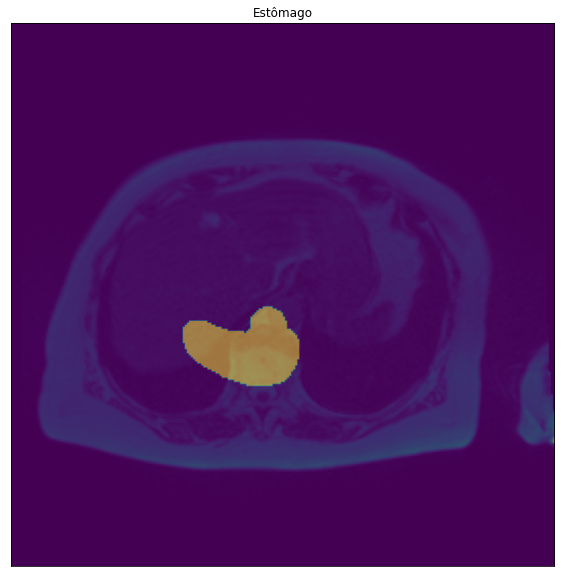

In [133]:
linha = dataset[dataset['segmentation'].notnull()].sample(1).iloc[0]
segmentation, image = linha['segmentation'], pd.DataFrame(plt.imread(linha['image']))

rle_mask = rle_decode(segmentation, shape=image.shape)

if rle_mask.shape != image.shape:
	rle_mask = rle_mask.transpose()

fig = plt.figure(figsize=(10, 10))
fig.patch.set_alpha(1)

plt.imshow(image)
plt.imshow(rle_mask, alpha=0.5)

nomes = {
	'stomach': 'Estômago',
	'large_bowel': 'Intestino Grosso',
	'small_bowel': 'Intestino Delgado',
}
plt.title(nomes[linha['class']])
plt.xticks([])
plt.yticks([])
plt.show()